![](chains.png)

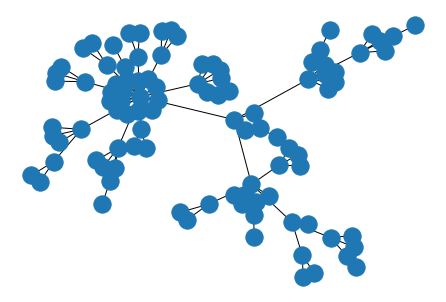

In [1]:
import   networkx as nx             #导入networkx包
import mlxtend as mlt
import pandas as pd
import matplotlib.pyplot as plt 
G = nx.random_graphs.barabasi_albert_graph(100,1)   #生成一个BA无标度网络G
nx.draw(G)                               #绘制网络G
plt.savefig("ba.png")           #输出方式1: 将图像存为一个png格式的图片文件
plt.show()                            #输出方式2: 在窗口中显示这幅图像 

一条链路唯一的ID，叫TraceID； 
链路中每一环的ID，叫做SpanID.



In [2]:
calls = [{'spanId': 'oc1', 'caller': 'osb_001', 'called': 'csf_001', 'frequent': 1},
         {'spanId': 'cl1', 'caller': 'csf_001', 'called': 'local_method_005', 'frequent': 1},
         {'spanId': 'cl2', 'caller': 'csf_001', 'called': 'local_method_010', 'frequent': 1},
        {'spanId': 'cc1', 'caller': 'csf_001', 'called': 'csf_004', 'frequent': 1},
        {'spanId': 'cc2', 'caller': 'csf_001', 'called': 'csf_003', 'frequent': 1},
        {'spanId': 'cc3', 'caller': 'csf_001', 'called': 'csf_002', 'frequent': 1},
        {'spanId': 'cl3', 'caller': 'csf_001', 'called': 'local_method_01', 'frequent': 1},
        {'spanId': 'cl4', 'caller': 'csf_001', 'called': 'local_method_03', 'frequent': 1},
        {'spanId': 'cc4', 'caller': 'csf_001', 'called': 'csf_005', 'frequent': 1},
        {'spanId': 'cl5', 'caller': 'csf_001', 'called': 'local_method_002', 'frequent': 1},
        {'spanId': 'cl6', 'caller': 'csf_001', 'called': 'local_method_009', 'frequent': 1},
        {'spanId': 'cl7', 'caller': 'csf_001', 'called': 'local_method_008', 'frequent': 1},
        {'spanId': 'cf1', 'caller': 'csf_001', 'called': 'fly_remote_001', 'frequent': 1},
        {'spanId': 'lo1', 'caller': 'local_method_005', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
        {'spanId': 'lo2', 'caller': 'lccal_method_010', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
        {'spanId': 'cl8', 'caller': 'csf_004', 'called': 'local_method_015', 'frequent': 1},
        {'spanId': 'cl9', 'caller': 'csf_004', 'called': 'local_method_016', 'frequent': 1},
        {'spanId': 'cl10', 'caller': 'csf_004', 'called': 'local_method_012', 'frequent': 1},
         {'spanId': 'cl11', 'caller': 'csf_003', 'called': 'local_method_012', 'frequent': 1},
         {'spanId': 'cl12', 'caller': 'csf_003', 'called': 'local_method_013', 'frequent': 1},
         {'spanId': 'cl13', 'caller': 'csf_003', 'called': 'local_method_014', 'frequent': 1},
         {'spanId': 'cl14', 'caller': 'csf_002', 'called': 'local_method_011', 'frequent': 1},
         {'spanId': 'lo3', 'caller': 'local_method_001', 'called': 'OracleStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'cl15', 'caller': 'csf_001', 'called': 'local_method_007', 'frequent': 1},
         {'spanId': 'cl16', 'caller': 'csf_001', 'called': 'local_method_004', 'frequent': 1},
         {'spanId': 'lo4', 'caller': 'local_method_003', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'cl17', 'caller': 'csf_005', 'called': 'local_method_017', 'frequent': 1},
         {'spanId': 'lo5', 'caller': 'local_method_002', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo6', 'caller': 'local_method_009', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo7', 'caller': 'local_method_008', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo8', 'caller': 'local_method_015', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo9', 'caller': 'local_method_016', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo10', 'caller': 'local_method_012', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo11', 'caller': 'local_method_013', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo12', 'caller': 'local_method_014', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo13', 'caller': 'local_method_011', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo14', 'caller': 'local_method_001', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo15', 'caller': 'local_method_007', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo16', 'caller': 'local_method_004', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
         {'spanId': 'lo17', 'caller': 'local_method_017', 'called': 'OraclePreparedStatementExcuteQuery', 'frequent': 1},
        ]

calldf = pd.DataFrame(calls)  #转为数据框

In [3]:
calldf.head()

,spanId,caller,called,frequent
0,oc1,osb_001,csf_001,1
1,cl1,csf_001,local_method_005,1
2,cl2,csf_001,local_method_010,1
3,cc1,csf_001,csf_004,1
4,cc2,csf_001,csf_003,1


In [4]:
calldf.shape
set(calldf.called.unique()) | set(calldf.caller.unique())   #所有节点


{'OraclePreparedStatementExcuteQuery',
 'OracleStatementExcuteQuery',
 'csf_001',
 'csf_002',
 'csf_003',
 'csf_004',
 'csf_005',
 'fly_remote_001',
 'lccal_method_010',
 'local_method_001',
 'local_method_002',
 'local_method_003',
 'local_method_004',
 'local_method_005',
 'local_method_007',
 'local_method_008',
 'local_method_009',
 'local_method_01',
 'local_method_010',
 'local_method_011',
 'local_method_012',
 'local_method_013',
 'local_method_014',
 'local_method_015',
 'local_method_016',
 'local_method_017',
 'local_method_03',
 'osb_001'}

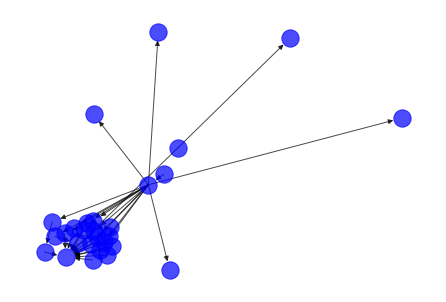

In [5]:
G = nx.DiGraph()   ##建立一个空的有向图

for node in set(calldf.called.unique()) | set(calldf.caller.unique()):  
    G.add_node(node)   #增加节点
 

for i in range(calldf.shape[0]):
    caller = calldf.iloc[i]["caller"]  
    called = calldf.iloc[i]["called"]
    G.add_edge(caller,called)  #增加边

ncolor=['r','b','k','g']  #颜色
#nshape=['o','d','>','v']
#nsize=[600,400,200,100]
nx.draw(G,node_color='b',font_size=23,alpha=0.7,node_size=300)                         #绘制网络G
#nx.draw_spring(G,font_size=20,width=2,node_size=100,node_color='#A0CBE2')
plt.savefig("calls.png")           #输出方式1: 将图像存为一个png格式的图片文件
plt.show()                            #输出方式2: 在窗口中显示这幅图像 

建立布局，对图进行布局美化，networkx 提供的布局方式有：
- circular_layout：节点在一个圆环上均匀分布
- random_layout：节点随机分布
- shell_layout：节点在同心圆上分布
- spring_layout： 用Fruchterman-Reingold算法排列节点（这个算法我不了解，样子类似多中心放射状）
- spectral_layout：根据图的拉普拉斯特征向量排列节

设置布局  
pos = nx.spring_layout   
布局也可用pos参数指定  
nx.draw(G, pos = spring_layout(G)) 这样指定了networkx上以中心放射状分布.

画图参数
- node_size: 指定节点的尺寸大小(默认是300，单位未知，就是上图中那么大的点)
- node_color: 指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等，具体可查看手册)，用“数据字典”赋值的时候必须对字典取值（.values()）后再赋值
- node_shape: 节点的形状（默认是圆形，用字符串'o'标识，具体可查看手册）
- alpha: 透明度 (默认是1.0，不透明，0为完全透明)
- width: 边的宽度 (默认为1.0)
- edge_color: 边的颜色(默认为黑色)
- style: 边的样式(默认为实现，可选： solid|dashed|dotted,dashdot)
- with_labels: 节点是否带标签（默认为True）
- font_size: 节点标签字体大小 (默认为12)
- font_color: 节点标签字体颜色（默认为黑色）   
e.g. nx.draw(G,node_size = 30, with_label = False)   
绘制节点的尺寸为30，不带标签的网络图。  

In [6]:
cause = calldf[['called','caller','frequent']]
#cause.rename(columns={'called':'antecedents', 'caller':'consequents', 'frequent':'confidence'}, inplace = True)

In [7]:
cause[:40]

,called,caller,frequent
0,csf_001,osb_001,1
1,local_method_005,csf_001,1
2,local_method_010,csf_001,1
3,csf_004,csf_001,1
4,csf_003,csf_001,1
5,csf_002,csf_001,1
6,local_method_01,csf_001,1
7,local_method_03,csf_001,1
8,csf_005,csf_001,1
9,local_method_002,csf_001,1


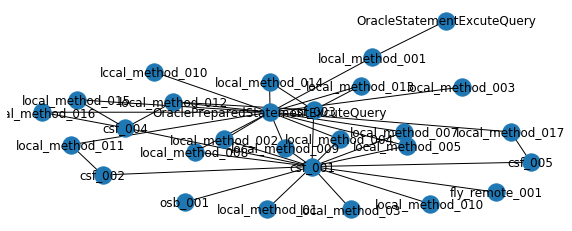

In [8]:
import networkx as nx 
fig, ax=plt.subplots(figsize=(10,4))
GA = nx.from_pandas_edgelist(cause,source='called',target='caller')
pos = nx.spring_layout(GA)
nx.draw(GA,position=pos,with_labels=True)
plt.show()

这个调用链图要和频繁项集结合使用  
例如经常出现的异常指标组成频繁项集，然后算出支持度，置信度
由置信度的定义我们可以分析，只要OraclePreparedStatementExcuteQuery有问题，那调用它的所有方法都要出问题，比如local_method_001
设 X 为OraclePreparedStatementExcuteQuery ，Y为local_method_001 则置信度为：  
$confidence(X→Y)=P(Y∣X)= \frac{support(X,Y)}{P(X)}= $
$\frac{N(X U Y)}{N(X)}$

但是local_method_001发生则不一定是OraclePreparedStatementExcuteQuery，所以confidence(Y→X)不一定是1  
接下来就是要找出异常指标的频繁项集（同时出现异常的指标）和关联关系